

You are given a dataset that contains the prices and other attributes of diamonds. The dataset has 9 columns: Carat, color, cut, clarity, depth, table, price, x, y, z.
carat: Carat weight of the diamond
cut: Describes cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
color: Color of the diamond, with D being the best and J the worst
clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
table %: The width of the diamond's table expressed as a percentage of its average diameter
price: The price of the diamond
x: length mm
y: width mm
z: depth mm
Your task is to predict the prices of diamonds given carat weight
Here is the dataset: https://drive.google.com/file/d/1lSgupNhVwXzR9aXbz2G0VwKQGEpx6pFl/view?usp=sharing


In [2]:
#Loading the libraries 

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline 

In [3]:
#Load the dataset 
df=pd.read_csv("../diamonds.csv")

In [4]:
#Preview the head 

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
len(df)

53940

In [6]:
#Get the information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
#Check columns are

df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [8]:
#Drop irrelevant columns 

df.drop(columns=['Unnamed: 0'], index=1, inplace=True)

In [9]:
#Confirm drop of the data

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [10]:
df.columns = df.columns.str.replace('carat', 'diamond_weight')

In [11]:
df.drop(columns=[ 'cut', 'color', 'clarity', 'depth', 'table',
        'x', 'y', 'z'], axis=1, inplace=True)

In [12]:
df.head()

,diamond_weight,price
0,0.23,326
2,0.23,327
3,0.29,334
4,0.31,335
5,0.24,336


In [13]:
X=df['diamond_weight'].values.reshape(-1,1)
y=df['price'].values

print(X)
print(y)

[[0.23]
 [0.23]
 [0.29]
 ...
 [0.7 ]
 [0.86]
 [0.75]]
[ 326  327  334 ... 2757 2757 2757]


# Do a scatter plot 

Text(0, 0.5, 'Price')

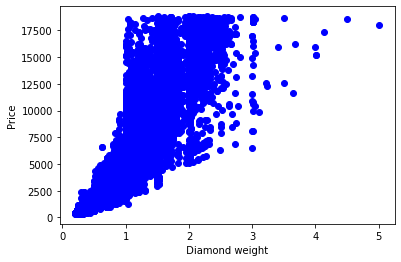

In [14]:
plt.scatter(X,y, color='blue')
plt.xlabel(' Diamond weight ')
plt.ylabel('Price')


# First lets do a linear regression model 

In [15]:
#First lets train on the whole data set 

from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

lin_reg.fit(X,y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly_reg=PolynomialFeatures(degree=6)

x_poly=poly_reg.fit_transform(X)




In [18]:
lin_reg2=LinearRegression()

lin_reg2.fit(x_poly,y)

LinearRegression()

# Visualizing the Polynomial Regression Results

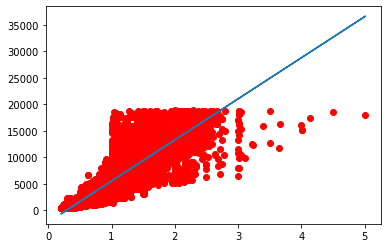

In [19]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X))

# Polynomial Visualization 

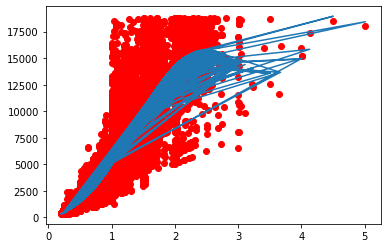

In [20]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)))

In [23]:
sns.displot((y_test-y_pred), bins=100, kde=True)

NameError: name 'y_test' is not defined